In [911]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


#### Data Loading

In [912]:
df = pd.read_csv(r'C:\Users\ual-laptop\Desktop\DataMining_Project\dataset\Apartments_rent.csv', sep=";", encoding='cp1252')
df

,id,category,title,body,amenities,bathrooms,bedrooms,currency,fee,has_photo,...,price_display,price_type,square_feet,address,cityname,state,latitude,longitude,source,time
0,5668626895,housing/rent/apartment,"Studio apartment 2nd St NE, Uhland Terrace NE,...","This unit is located at second St NE, Uhland T...",NaN,NaN,0.0,USD,No,Thumbnail,...,$790,Monthly,101,NaN,Washington,DC,38.9057,-76.9861,RentLingo,1577359415
1,5664597177,housing/rent/apartment,Studio apartment 814 Schutte Road,"This unit is located at 814 Schutte Road, Evan...",NaN,NaN,1.0,USD,No,Thumbnail,...,$425,Monthly,106,814 Schutte Rd,Evansville,IN,37.9680,-87.6621,RentLingo,1577017063
2,5668626833,housing/rent/apartment,"Studio apartment N Scott St, 14th St N, Arling...","This unit is located at N Scott St, 14th St N,...",NaN,1.0,0.0,USD,No,Thumbnail,...,"$1,390",Monthly,107,NaN,Arlington,VA,38.8910,-77.0816,RentLingo,1577359410
3,5659918074,housing/rent/apartment,Studio apartment 1717 12th Ave,"This unit is located at 1717 12th Ave, Seattle...",NaN,1.0,0.0,USD,No,Thumbnail,...,$925,Monthly,116,1717 12th Avenue,Seattle,WA,47.6160,-122.3275,RentLingo,1576667743
4,5668626759,housing/rent/apartment,"Studio apartment Washington Blvd, N Cleveland ...","This unit is located at Washington Blvd, N Cle...",NaN,NaN,0.0,USD,No,Thumbnail,...,$880,Monthly,125,NaN,Arlington,VA,38.8738,-77.1055,RentLingo,1577359401
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,5630240092,housing/rent/apartment,Five BR 5407 Abbott Place - Abbott,This unit is located at 5407 Abbott Place - Ab...,NaN,4.0,5.0,USD,No,Thumbnail,...,"$6,000",Monthly,6300,5407 Abbott Place Abbott,Edina,MN,44.9000,-93.3233,RentLingo,1575112975
9996,5668640983,housing/rent/apartment,Six BR 256 Las Entradas,"This unit is located at 256 Las Entradas, Mont...",NaN,8.0,6.0,USD,No,Thumbnail,...,"$25,000",Monthly,8716,256 Las Entradas,Montecito,CA,34.4331,-119.6331,RentLingo,1577360419
9997,5668643292,housing/rent/apartment,Six BR 9908 Bentcross Drive,"This unit is located at 9908 Bentcross Drive, ...",NaN,8.5,6.0,USD,No,Thumbnail,...,"$11,000",Monthly,11318,9908 Bentcross Dr,Potomac,MD,39.0287,-77.2409,RentLingo,1577360560
9998,5668662559,housing/rent/apartment,One BR in New York NY 10069,"Monthly Rent$4,605 -to $4,790AmenitiesThe Aldy...","Basketball,Cable or Satellite,Doorman,Hot Tub,...",NaN,1.0,USD,No,Thumbnail,...,"$4,790",Monthly,40000,NaN,New York,NY,40.7716,-73.9876,Listanza,1577362186


In [913]:
df.columns

Index(['id', 'category', 'title', 'body', 'amenities', 'bathrooms', 'bedrooms',
       'currency', 'fee', 'has_photo', 'pets_allowed', 'price',
       'price_display', 'price_type', 'square_feet', 'address', 'cityname',
       'state', 'latitude', 'longitude', 'source', 'time'],
      dtype='object')

In [914]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             10000 non-null  int64  
 1   category       10000 non-null  object 
 2   title          10000 non-null  object 
 3   body           10000 non-null  object 
 4   amenities      6451 non-null   object 
 5   bathrooms      9966 non-null   float64
 6   bedrooms       9993 non-null   float64
 7   currency       10000 non-null  object 
 8   fee            10000 non-null  object 
 9   has_photo      10000 non-null  object 
 10  pets_allowed   5837 non-null   object 
 11  price          10000 non-null  int64  
 12  price_display  10000 non-null  object 
 13  price_type     10000 non-null  object 
 14  square_feet    10000 non-null  int64  
 15  address        6673 non-null   object 
 16  cityname       9923 non-null   object 
 17  state          9923 non-null   object 
 18  latitud

In [915]:
df.describe()

,id,bathrooms,bedrooms,price,square_feet,latitude,longitude,time
count,1.000000e+04,9966.000000,9993.000000,10000.000000,10000.000000,9990.000000,9990.000000,1.000000e+04
mean,5.623396e+09,1.380544,1.744021,1486.277500,945.810500,37.695162,-94.652247,1.574891e+09
std,7.021025e+07,0.615410,0.942354,1076.507968,655.755736,5.495851,15.759805,3.762395e+06
min,5.508654e+09,1.000000,0.000000,200.000000,101.000000,21.315500,-158.022100,1.568744e+09
25%,5.509248e+09,1.000000,1.000000,949.000000,649.000000,33.679850,-101.301700,1.568781e+09
50%,5.668610e+09,1.000000,2.000000,1270.000000,802.000000,38.809800,-93.651600,1.577358e+09
75%,5.668626e+09,2.000000,2.000000,1695.000000,1100.000000,41.349800,-82.209975,1.577359e+09
max,5.668663e+09,8.500000,9.000000,52500.000000,40000.000000,61.594000,-70.191600,1.577362e+09


In [916]:
# Missing values 
df.isnull().sum()

id                  0
category            0
title               0
body                0
amenities        3549
bathrooms          34
bedrooms            7
currency            0
fee                 0
has_photo           0
pets_allowed     4163
price               0
price_display       0
price_type          0
square_feet         0
address          3327
cityname           77
state              77
latitude           10
longitude          10
source              0
time                0
dtype: int64

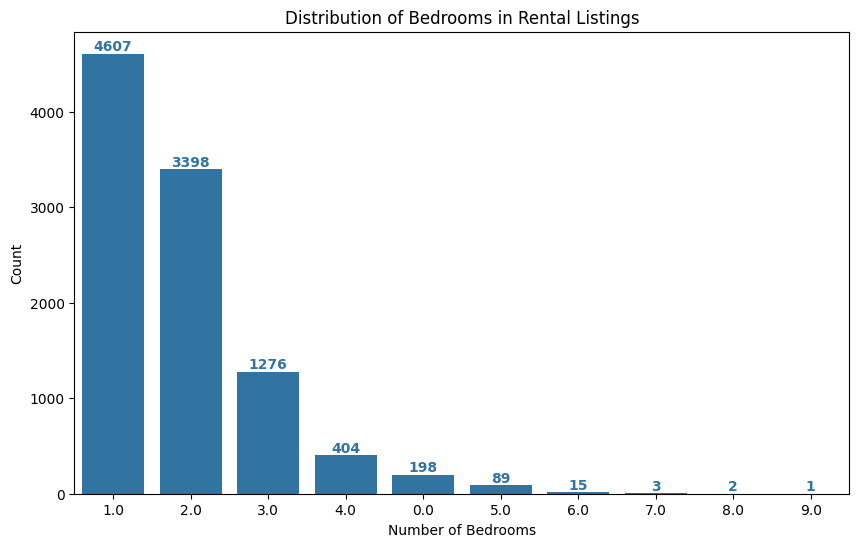

In [917]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df, x='bedrooms', order=df['bedrooms'].value_counts().index)
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha='center', va='bottom', 
                fontsize=10, color=p.get_facecolor(),  
                weight='bold')  
plt.xlabel('Number of Bedrooms')
plt.ylabel('Count')
plt.title('Distribution of Bedrooms in Rental Listings')
plt.show()

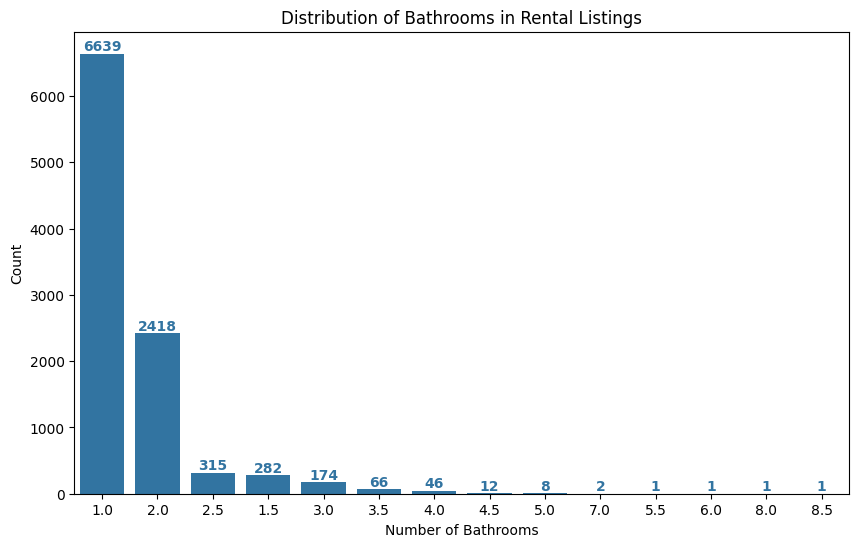

In [918]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df, x='bathrooms', order=df['bathrooms'].value_counts().index)
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha='center', va='bottom', 
                fontsize=10, color=p.get_facecolor(),  
                weight='bold')  
plt.xlabel('Number of Bathrooms')
plt.ylabel('Count')
plt.title('Distribution of Bathrooms in Rental Listings')
plt.show()

#### Data Cleaning

In [919]:
df.drop(columns=["amenities","id", "title", "body", "price_display", "currency", "address", "source"], inplace=True)

In [920]:
for feat in ["pets_allowed"]:
    df[feat] = df[feat].fillna("missing") # replacing missing values with "missing"

In [921]:
for feat in ["bedrooms", "bathrooms"]:
    df[feat] = df[feat].fillna(df[feat].median())

In [922]:
df.isnull().sum()

category         0
bathrooms        0
bedrooms         0
fee              0
has_photo        0
pets_allowed     0
price            0
price_type       0
square_feet      0
cityname        77
state           77
latitude        10
longitude       10
time             0
dtype: int64

In [923]:
df = df.dropna() 

In [924]:
df.isnull().sum()

category        0
bathrooms       0
bedrooms        0
fee             0
has_photo       0
pets_allowed    0
price           0
price_type      0
square_feet     0
cityname        0
state           0
latitude        0
longitude       0
time            0
dtype: int64

In [925]:
df_cleaned = df.dropna(subset=['cityname', 'state'])
df_cleaned['bathrooms'] = df_cleaned['bathrooms'].fillna(df_cleaned['bathrooms'].median())
df_cleaned['bedrooms'] = df_cleaned['bedrooms'].fillna(df_cleaned['bedrooms'].median())


In [926]:
df_cleaned['fee'] = df_cleaned['fee'].map({'No':0, 'Yes':1})

In [927]:
df_cleaned.dtypes

category         object
bathrooms       float64
bedrooms        float64
fee               int64
has_photo        object
pets_allowed     object
price             int64
price_type       object
square_feet       int64
cityname         object
state            object
latitude        float64
longitude       float64
time              int64
dtype: object

In [928]:
threshold = 100

for feat in ["cityname", "state"]:
    counts = df_cleaned[feat].value_counts() 
    to_keep = counts[counts >= threshold].index  
    df_cleaned[feat] = df_cleaned[feat].where(df_cleaned[feat].isin(to_keep), other='Other')

for feat in ["category", "has_photo", "price_type", "pets_allowed"]:
    counts = df_cleaned[feat].value_counts()  
    to_keep = counts[counts >= threshold].index
    df_cleaned = df_cleaned[df_cleaned[feat].isin(to_keep) | df_cleaned[feat].isna()] 

In [929]:
df_cleaned.dtypes

category         object
bathrooms       float64
bedrooms        float64
fee               int64
has_photo        object
pets_allowed     object
price             int64
price_type       object
square_feet       int64
cityname         object
state            object
latitude        float64
longitude       float64
time              int64
dtype: object

# EDA

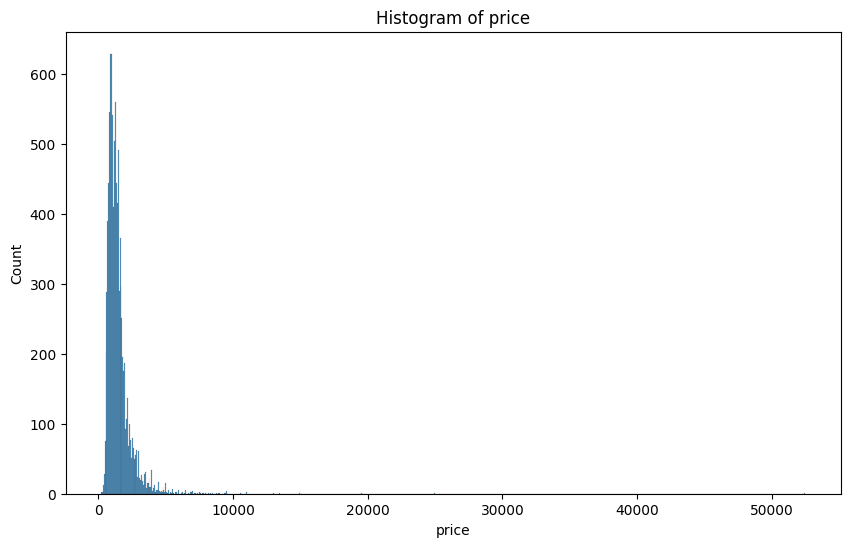

In [930]:
plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned['price'])
plt.title('Histogram of price')
plt.show()

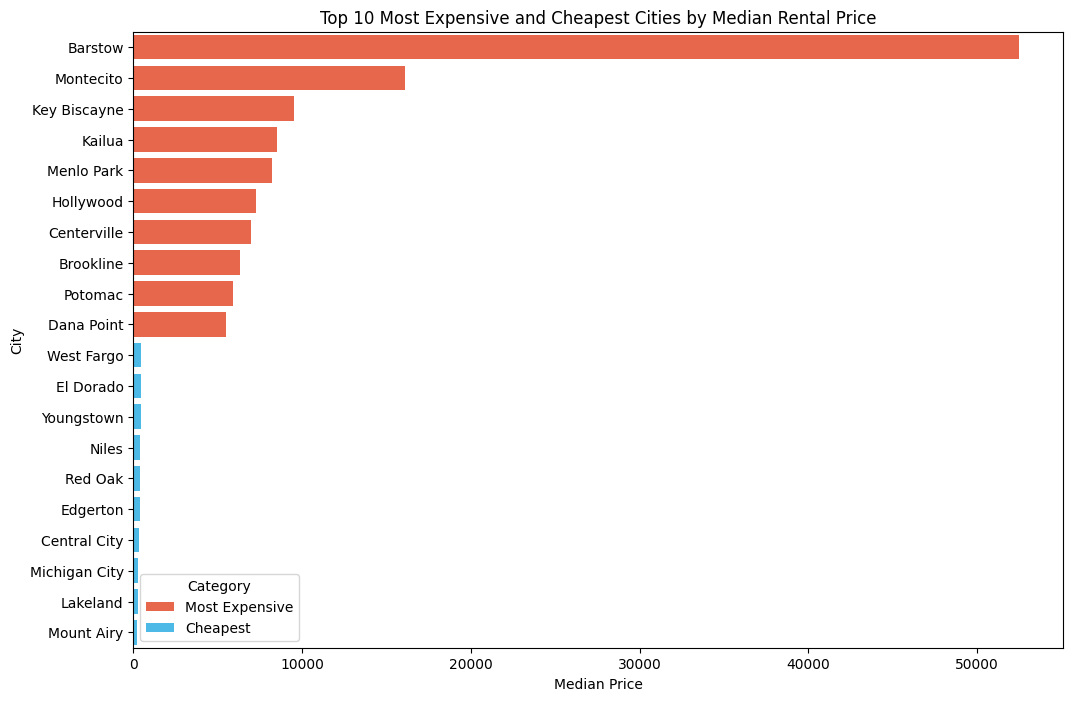

In [931]:
city_prices = df.groupby('cityname')['price'].median()
top_10_expensive = city_prices.nlargest(10)
top_10_cheapest = city_prices.nsmallest(10)
top_cities = pd.concat([top_10_expensive, top_10_cheapest]).reset_index()
top_cities['Category'] = ['Most Expensive'] * 10 + ['Cheapest'] * 10
top_cities = top_cities.sort_values(by='price', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(data=top_cities, x='price', y='cityname', hue='Category', dodge=False, palette=['#FF5733', '#33C3FF'])
plt.xlabel('Median Price')
plt.ylabel('City')
plt.title('Top 10 Most Expensive and Cheapest Cities by Median Rental Price')
plt.show()


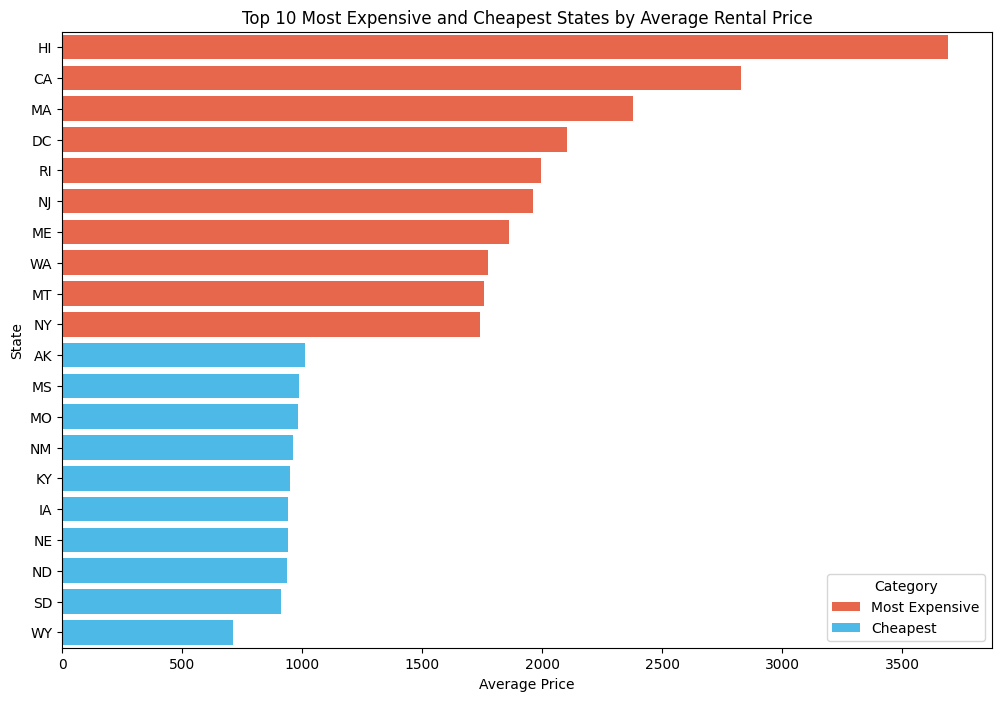

In [932]:
state_prices = df.groupby('state')['price'].mean()
top_10_expensive_states = state_prices.nlargest(10)
top_10_cheapest_states = state_prices.nsmallest(10)
top_states = pd.concat([top_10_expensive_states, top_10_cheapest_states]).reset_index()
top_states['Category'] = ['Most Expensive'] * 10 + ['Cheapest'] * 10
top_states = top_states.sort_values(by='price', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(data=top_states, x='price', y='state', hue='Category', dodge=False, palette=['#FF5733', '#33C3FF'])

plt.xlabel('Average Price')
plt.ylabel('State')
plt.title('Top 10 Most Expensive and Cheapest States by Average Rental Price')

plt.show()

In [933]:
fig = px.scatter_mapbox(df_cleaned, 
                    lat='latitude', 
                    lon='longitude', color='price',
                    hover_name='price', 
                    mapbox_style='carto-positron',
                    zoom=3,
                    height=600
)
fig.show()


#### Data Splitting & Processing

In [934]:
df_cleaned.dtypes

category         object
bathrooms       float64
bedrooms        float64
fee               int64
has_photo        object
pets_allowed     object
price             int64
price_type       object
square_feet       int64
cityname         object
state            object
latitude        float64
longitude       float64
time              int64
dtype: object

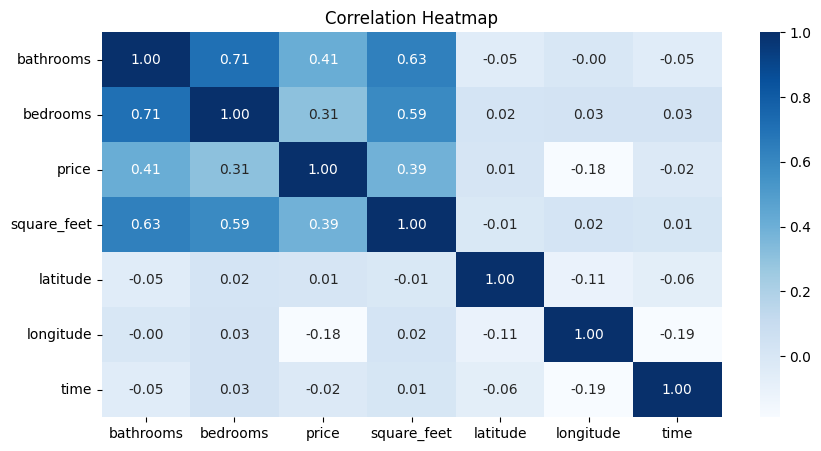

In [935]:
import seaborn as sns
corr_classes = ['has_photo','pets_allowed','amenities','cityname','state','fee','is_northern','category','price_type']
corr_matrix = df_cleaned.drop(columns=corr_classes, errors='ignore').corr()
plt.figure(figsize=(10, 5))
sns.heatmap(corr_matrix, annot=True, cmap="Blues", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [936]:
price_bins = [0, 1000, 2000, np.inf]
df_cleaned['price_category'] = pd.cut(df_cleaned['price'], bins=price_bins, labels=['Low', 'Medium', 'High'])

label_encoders = {}
for col in ['cityname', 'state','price_category']:
    le = LabelEncoder()
    df_cleaned[col] = le.fit_transform(df_cleaned[col])
    label_encoders[col] = le

features = ['cityname', 'state', 'bathrooms', 'bedrooms', 'square_feet']
X = df_cleaned[features]
y = df_cleaned['price_category']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

print(classification_report(y_test, y_pred, target_names=['Low', 'Medium', 'High']))

              precision    recall  f1-score   support

         Low       0.67      0.66      0.67       284
      Medium       0.64      0.62      0.63       605
        High       0.73      0.74      0.73      1095

    accuracy                           0.69      1984
   macro avg       0.68      0.68      0.68      1984
weighted avg       0.69      0.69      0.69      1984



In [937]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print(X_scaled[:5])

[[ 0.34277533  0.76715202 -0.61658906 -1.85046602 -1.28609235]
 [ 0.34277533 -0.86856712 -0.61658906 -0.7895878  -1.27848547]
 [ 0.34277533  1.11766326 -0.61658906 -1.85046602 -1.27696409]
 [ 0.34277533  1.23450034 -0.61658906 -1.85046602 -1.2632717 ]
 [ 0.34277533  1.11766326 -0.61658906 -1.85046602 -1.2495793 ]]


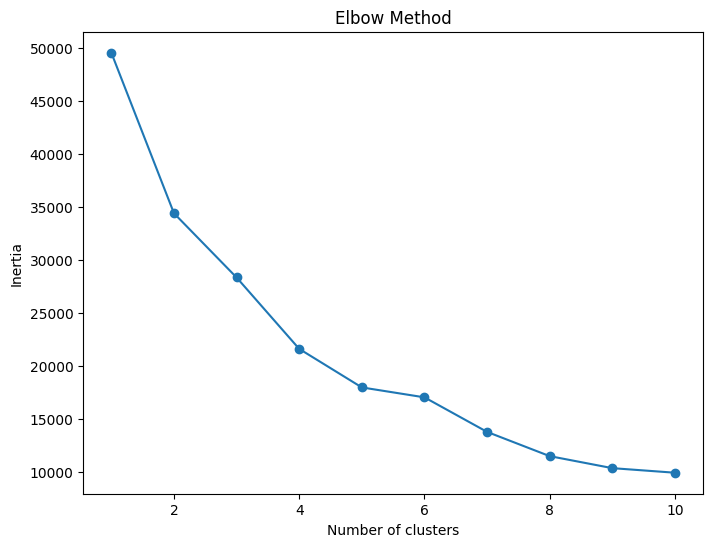

In [938]:
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)
    
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()


In [939]:
k = 10 
kmeans = KMeans(n_clusters=k, random_state=42)
y_kmeans = kmeans.fit_predict(X_scaled)

df_cleaned['cluster'] = y_kmeans

print(df_cleaned[['price', 'cluster']])


      price  cluster
0       790        3
1       425        6
2      1390        3
3       925        3
4       880        3
...     ...      ...
9995   6000        7
9996  25000        7
9997  11000        7
9998   4790        9
9999   1009        6

[9917 rows x 2 columns]


In [940]:
silhouette_avg = silhouette_score(X_scaled, y_kmeans)
print(f'Silhouette Score: {silhouette_avg}')


Silhouette Score: 0.37463655042472216


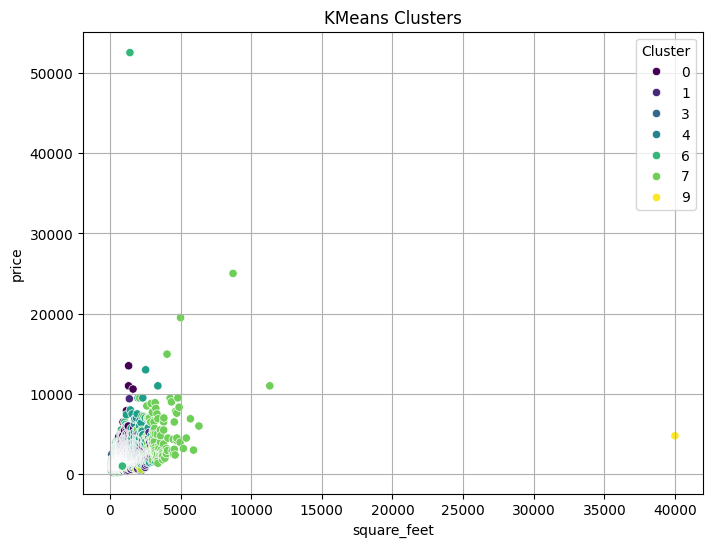

In [941]:
import matplotlib.pyplot as plt
import seaborn as sns

feature_x = 'square_feet'  
feature_y = 'price'    

# Plot the clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_cleaned[feature_x], y=df_cleaned[feature_y], hue=df_cleaned['cluster'], palette='viridis')

plt.title('KMeans Clusters')
plt.xlabel(feature_x)
plt.ylabel(feature_y)
plt.legend(title='Cluster', loc='upper right')
plt.grid()
plt.show()


#### DBSCAN

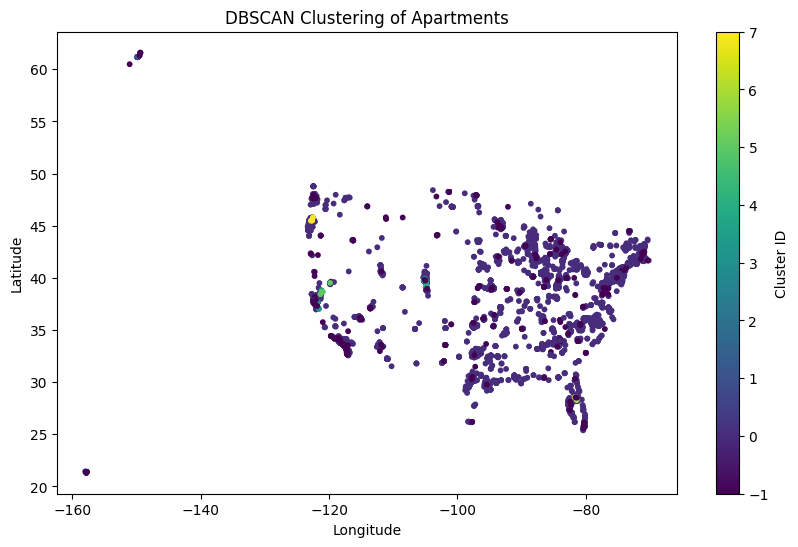

In [942]:
from sklearn.cluster import DBSCAN
import numpy as np

# Normalize the data for DBSCAN
scaler = StandardScaler()
X_dbscan = scaler.fit_transform(df_cleaned[['price', 'square_feet', 'latitude', 'longitude']])

dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_dbscan)

df_cleaned['dbscan_cluster'] = dbscan_labels

cluster_counts = np.unique(dbscan_labels, return_counts=True)

plt.figure(figsize=(10, 6))
plt.scatter(df_cleaned['longitude'], df_cleaned['latitude'], c=dbscan_labels, cmap='viridis', s=10)
plt.title("DBSCAN Clustering of Apartments")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.colorbar(label='Cluster ID')
plt.show()

In [943]:
from sklearn.metrics import silhouette_score

# Exclude noise points (label -1) for silhouette calculation
X_dbscan_clean = X_dbscan[dbscan_labels != -1]
labels_clean = dbscan_labels[dbscan_labels != -1]

silhouette = silhouette_score(X_dbscan_clean, labels_clean)
print(f"Silhouette Score: {silhouette}")


Silhouette Score: 0.34791083169980297
